In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
sns.set(font_scale=.8)

In [3]:
data_raw = pd.read_excel('data/Lovering_2022_data.xlsx', sheet_name='Data from Lovering (2022)')
data = data_raw[['Fuel','LUIE']]

In [4]:
stats = data.groupby('Fuel').agg(
    {'LUIE':['min', 'median', 'max']})

In [7]:
sorted_index = stats['LUIE','median'].sort_values().index

[None]

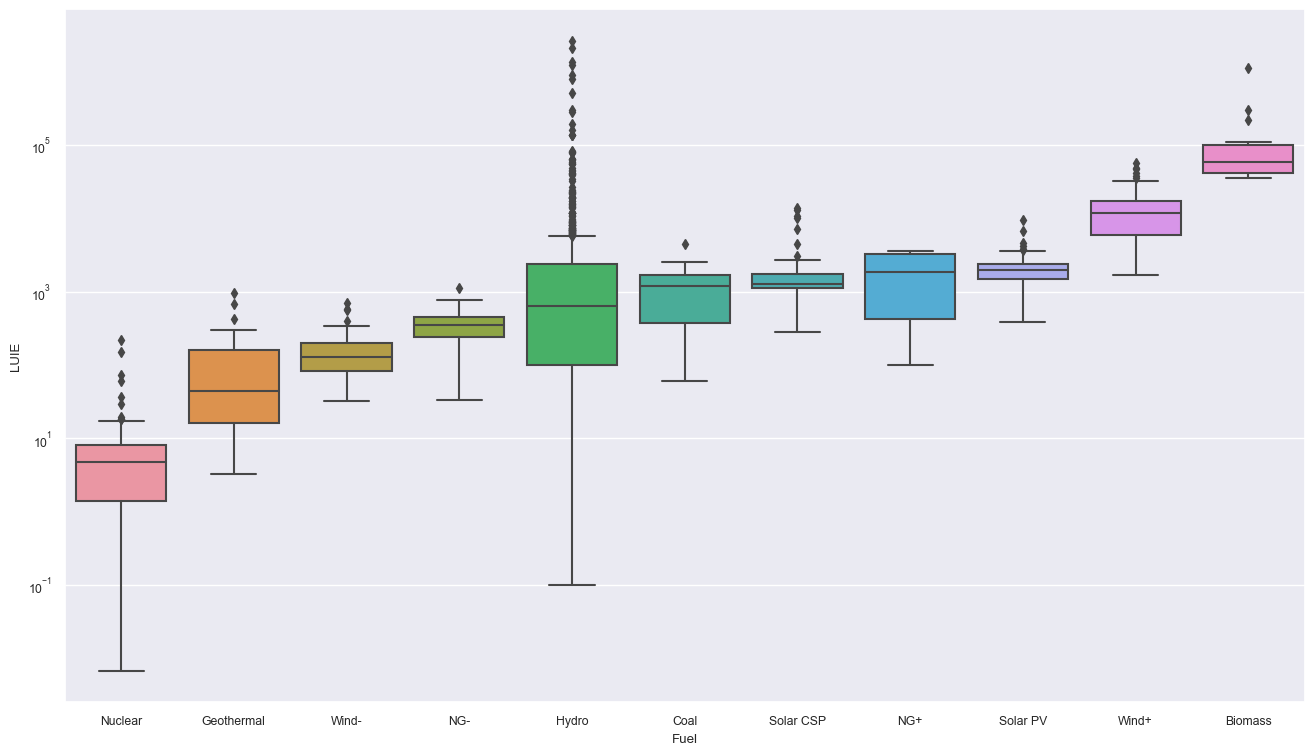

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="Fuel", y="LUIE", data=data, order=sorted_index)
ax.set(yscale="log")

# Country statistics

The three csv files come from ourworldindata.org

In [17]:
energy_consumption = pd.read_csv('data/per-capita-energy-use.csv', index_col=[0,1,2])

In [16]:
population_density = pd.read_csv('data/population-density.csv', index_col=[0,1,2])

In [63]:
population = pd.read_csv('data/population.csv', index_col=[0,1,2])

In [64]:
ed = pd.concat([population, population_density, energy_consumption], axis=1).reset_index()

In [83]:
ed_all = ed[
    (~pd.isna(ed['Population density'])) & \
    (~pd.isna(ed['Primary energy consumption per capita (kWh/person)'])) & \
    (ed['Code'].str.len() == 3)].sort_values(by='Year')

In [90]:
fig = px.scatter(ed_all, x='Population density',
           y='Primary energy consumption per capita (kWh/person)',
           size='Population (historical estimates)',
           animation_frame='Year',
           animation_group='Entity',
           hover_data=['Entity'],
           log_x=True, log_y=True,
           width=1000, height=600)

In [91]:
fig